In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
!pip install catboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

  Using cached catboost-1.2.2-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)


In [ ]:
sns.set(rc={'figure.figsize':(8,5)})

In [ ]:
df=pd.read_csv("Train.csv")
data=pd.read_csv("Train.csv")
df_copy=df.copy()
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df_copy.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation'], dtype='object')

In [ ]:
df_copy["Segmentation"].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [ ]:
df_copy["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

Text(0.5, 1.0, 'Segmentation')

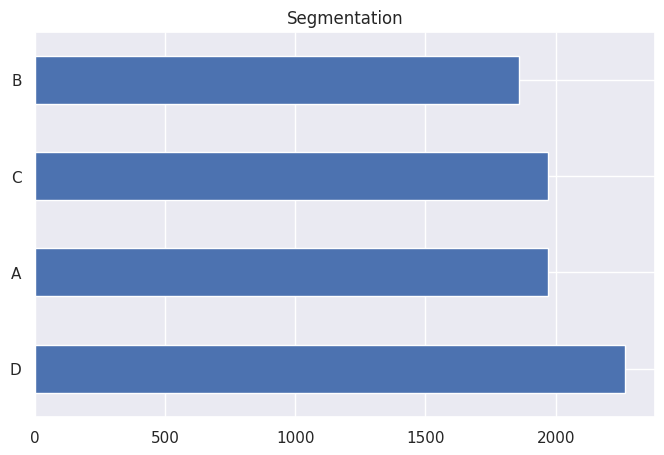

In [ ]:
df_copy['Segmentation'].value_counts().plot.barh().set_title("Segmentation")#barh yatay bar dikey sütun

In [ ]:
df_copy['Segmentation'].index

RangeIndex(start=0, stop=8068, step=1)

Text(0.5, 1.0, 'density')

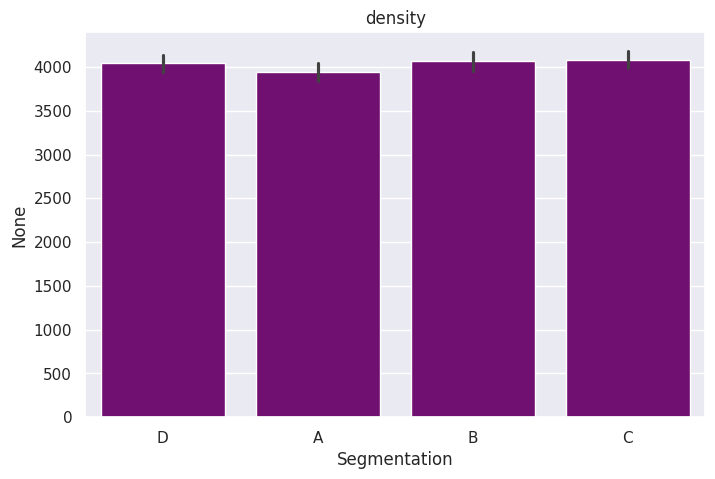

In [ ]:
sns.barplot(x="Segmentation",y=df['Segmentation'].index, data=df,color="purple").set_title("density")

Text(0.5, 1.0, 'class - age - gender')

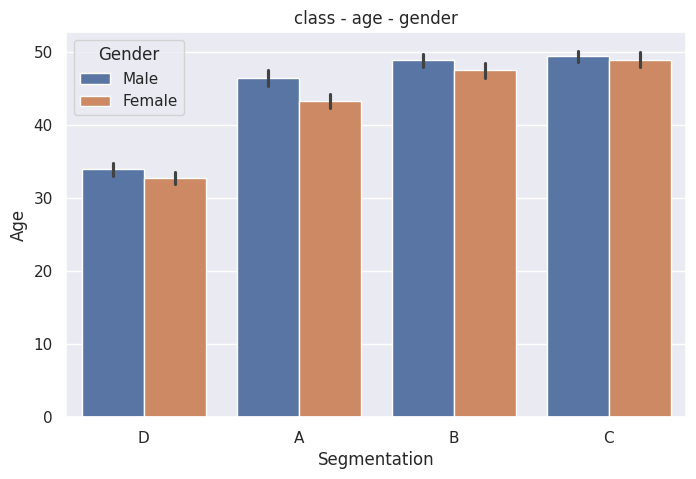

In [ ]:
sns.barplot(x="Segmentation",y="Age",hue="Gender", data=df_copy)
plt.title("class - age - gender")

In [ ]:
unique_counts = df_copy.nunique()
unique_counts

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
Segmentation          4
dtype: int64

<ipython-input-16-b4db0a19bac6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Segmentation").sum().plot.pie(y="Age",autopct="%.1f%%",ylabel="",legend=False,figsize=(5,5))


<Axes: >

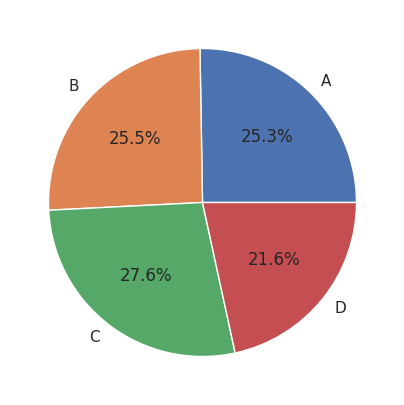

In [ ]:
df.groupby("Segmentation").sum().plot.pie(y="Age",autopct="%.1f%%",ylabel="",legend=False,figsize=(5,5))

In [ ]:
cols=["Age","Work_Experience","Family_Size"]
for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col,y="Age",data=df)

In [ ]:
sns.histplot(df_copy["Age"],kde=True)#bins auto

In [ ]:
sns.jointplot(x="Work_Experience",y=df_copy["Age"],data=df)

In [ ]:
sns.catplot(x="Segmentation",y="Age",data=df)
plt.title("")

In [ ]:
sns.catplot(x="Segmentation",y="Age",hue="Gender",kind="point",data=df)
plt.title("")

In [ ]:
sns.FacetGrid(df,hue="Segmentation",height=5,xlim=(0,100)).map(sns.kdeplot,"Age",fill=True).add_legend()

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(),annot=True);

In [ ]:
from os import mkdir

In [ ]:
try:
  mkdir("Plots")
except:
    pass

mypaths="Plots"

In [ ]:
f, axes=plt.subplots(5,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle("")
cols=df.select_dtypes(exclude="object").columns

x_axis=0
y_axis=0

for col in cols:
    sns.histplot(data=df,x=col,kde=True,ax=axes[x_axis,y_axis])
    axes[x_axis,y_axis].set_xlabel(col.title())
    axes[x_axis,y_axis].set_ylabel("Count")
    axes[x_axis,y_axis].set_title(f"{col.title()}Count")
    if y_axis==1:
      y_axis=0
      x_axis+=1
    else:
      y_axis+=1
plt.show()

In [ ]:
f, axes=plt.subplots(5,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle("Boxplots")
cols=df.select_dtypes(exclude="object").columns

x_axis=0
y_axis=0

for col in cols:
    sns.boxplot(data=df,x=col,ax=axes[x_axis,y_axis])
    axes[x_axis,y_axis].set_xlabel(col)
    axes[x_axis,y_axis].set_ylabel("Count")
    axes[x_axis,y_axis].set_title(f"{col.title()} Box Plot")
    if y_axis==1:
      y_axis=0
      x_axis+=1
    else:
      y_axis+=1

plt.savefig("Plots/boxplots.png")
plt.show()

In [ ]:
age_group=df.groupby("Age").sum()
age_group

In [ ]:
age_group["Family_Size"].plot()

In [ ]:
ax1=sns.barplot(x=age_group.index,y=age_group["Work_Experience"].values)
ax1.tick_params(axis='x',rotation=90)

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
plt.title("correlation matrix")
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
def find_non_zero_decimal_rows_in_A(df):
    non_zero_decimal_rows_in_A = df['Work_Experience'].apply(lambda x: x % 1 != 0 if isinstance(x, float) else False)
    return df[non_zero_decimal_rows_in_A]

# Fonksiyonu çağır
result = find_non_zero_decimal_rows_in_A(df)
print(result)


In [ ]:
df_copy.tail(10)

In [ ]:
categori=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]
for col in categori:
    df_copy[col] = df_copy[col].astype(CategoricalDtype())

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   category
 2   Ever_Married     7928 non-null   category
 3   Age              8068 non-null   int64   
 4   Graduated        7990 non-null   category
 5   Profession       7944 non-null   category
 6   Work_Experience  7239 non-null   float64 
 7   Spending_Score   8068 non-null   category
 8   Family_Size      7733 non-null   float64 
 9   Var_1            7992 non-null   category
 10  Segmentation     8068 non-null   category
dtypes: category(7), float64(2), int64(2)
memory usage: 308.8 KB


In [ ]:
df_copy.isnull().sum()

In [ ]:
for column in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
  df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.00,Cat_6,A


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   category
 2   Ever_Married     8068 non-null   category
 3   Age              8068 non-null   int64   
 4   Graduated        8068 non-null   category
 5   Profession       8068 non-null   category
 6   Work_Experience  7239 non-null   float64 
 7   Spending_Score   8068 non-null   category
 8   Family_Size      7733 non-null   float64 
 9   Var_1            8068 non-null   category
 10  Segmentation     8068 non-null   category
dtypes: category(7), float64(2), int64(2)
memory usage: 308.8 KB


In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [ ]:
df_copy.duplicated().sum()


In [ ]:
df_copy.describe().T


In [ ]:
df_copy= df_copy.drop('ID', axis=1)

In [ ]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['Gender'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Cinsiyet', fontsize=14)
ax.set_ylabel('Değer', fontsize=14)
axs[0].set_title("Cinsiyet Sayısı", fontsize=16)

ax2 = df_copy['Gender'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');
axs[1].set_title("Cinsiyet Oranı", fontsize=16);

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, x='Segmentation', hue='Gender', palette="Set3",)
plt.title('');
plt.xlabel('')
plt.ylabel('')


In [ ]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [ ]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

In [ ]:
df_copy.info()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
num_cols = ["Work_Experience", "Family_Size"]
df_copy[num_cols] = imputer.fit_transform(df_copy[num_cols])

In [ ]:
integers=["Work_Experience","Family_Size"]
for column in integers:
  df_copy[column]=df_copy[column].astype("int64")

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           8068 non-null   category
 1   Ever_Married     8068 non-null   category
 2   Age              8068 non-null   int64   
 3   Graduated        8068 non-null   category
 4   Profession       8068 non-null   category
 5   Work_Experience  8068 non-null   int64   
 6   Spending_Score   8068 non-null   category
 7   Family_Size      8068 non-null   int64   
 8   Var_1            8068 non-null   category
 9   Segmentation     8068 non-null   category
dtypes: category(7), int64(3)
memory usage: 245.8 KB


In [ ]:
df_copy.isnull().sum()

In [ ]:
#import pandas as pd

df_copy = pd.get_dummies(df_copy, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

df_copy.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_0,Gender_1,Ever_Married_0,Ever_Married_1,Graduated_0,Graduated_1,Profession_0,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Spending_Score_0,Spending_Score_1,Spending_Score_2,Var_1_0,Var_1_1,Var_1_2,Var_1_3,Var_1_4,Var_1_5,Var_1_6
0,-1.28,-0.45,0.77,3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-0.33,-0.45,0.11,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1.41,-0.45,-1.20,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1.41,-0.75,-0.54,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,-0.21,-0.45,2.09,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
num_cols=["Age","Work_Experience","Family_Size"]
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#num_cols = ["Age", "Work_Experience", "Family_Size"]
#scaler = MinMaxScaler()
#df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])


In [ ]:
df_copy.head()

In [ ]:
df_copy.nunique()

In [ ]:
categori

In [ ]:
df_copy.describe().T

In [ ]:
le = LabelEncoder()
for col in categori:
    df_copy[col] = le.fit_transform(df_copy[col])

df_copy.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,3,3
1,0,1,38,1,2,1,0,3,3,0
2,0,1,67,1,2,1,2,1,5,1
3,1,1,67,1,7,0,1,2,5,1
4,0,1,40,1,3,1,1,6,5,0
5,1,1,56,0,0,0,0,2,5,2
6,1,0,32,1,5,1,2,3,5,2
7,0,0,33,1,5,1,2,3,5,3
8,0,1,61,1,2,0,2,3,6,3
9,0,1,55,1,0,1,0,4,5,2


In [ ]:
test_df = pd.read_csv('Test.csv')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
test_categori=["Gender","Ever_Married","Graduated","Profession","Spending_Score","Var_1","Segmentation"]
for col in test_categori:
    test_df[col] = test_df[col].astype(CategoricalDtype())

In [ ]:
#for column in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
    # Mod değeri hesaplanır
 #   mode_value = test_df[column].mode()[0]

    # Eğer mod değeri 'Yes' veya 'No' ise, null değerler mod değeri ile doldurulur
  #  if mode_value in ['Yes', 'No']:
   #     test_df[column].fillna(mode_value, inplace=True)
    # Eğer mod değeri 'Yes' veya 'No' değilse, null değerler 'Bilinmiyor' ile doldurulur
    #else:
        # 'Bilinmiyor' kategorisi eklenir
     #   test_df[column] = test_df[column].cat.add_categories(['Bilinmiyor'])
      #  test_df[column].fillna('Bilinmiyor', inplace=True)

#test_df.head()


In [ ]:
for column in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']:
  test_df[column].fillna(test_df[column].mode()[0], inplace=True)
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.00,Low,1.00,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.00,Average,4.00,Cat_6,A
2,458996,Female,Yes,69,No,Artist,0.00,Low,1.00,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.00,High,2.00,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.00,Cat_6,A


In [ ]:
test_df= test_df.drop('ID', axis=1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
test_num_cols = ["Work_Experience", "Family_Size"]
test_df[num_cols] = imputer.fit_transform(test_df[num_cols])

In [ ]:
test_integers=["Age","Work_Experience","Family_Size"]
for column in test_integers:
  test_df[column]=test_df[column].astype("int64")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           2627 non-null   category
 1   Ever_Married     2627 non-null   category
 2   Age              2627 non-null   int64   
 3   Graduated        2627 non-null   category
 4   Profession       2627 non-null   category
 5   Work_Experience  2627 non-null   int64   
 6   Spending_Score   2627 non-null   category
 7   Family_Size      2627 non-null   int64   
 8   Var_1            2627 non-null   category
 9   Segmentation     2627 non-null   category
dtypes: category(7), int64(3)
memory usage: 81.1 KB


In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#num_cols = ["Age", "Work_Experience", "Family_Size"]
#scaler = MinMaxScaler()
#test_df[num_cols] = scaler.fit_transform(test_df[num_cols])


In [ ]:
num_cols=["Age","Work_Experience","Family_Size"]
scaler = StandardScaler()
test_df[num_cols] = scaler.fit_transform(test_df[num_cols])

In [ ]:
le = LabelEncoder()
for col in test_categori:
    test_df[col] = le.fit_transform(test_df[col])

test_df.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,-0.45,1,2,-0.78,2,-1.18,5,1
1,1,1,-0.39,1,5,1.66,0,0.77,5,0
2,0,1,1.49,0,0,-0.78,2,-1.18,5,0
3,1,1,0.90,0,4,2.58,1,-0.53,5,1
4,0,0,-1.45,0,8,-0.17,2,0.77,5,0
5,1,1,0.20,1,1,-0.78,1,1.42,3,2
6,1,1,1.02,1,1,0.75,2,0.12,5,3
7,0,1,0.20,1,0,-0.48,0,0.12,5,3
8,1,1,0.37,1,0,-0.17,0,0.77,5,1
9,1,0,-1.45,0,5,-0.78,2,0.77,5,1


In [ ]:
#import pandas as pd

test_df = pd.get_dummies(test_df, columns=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

test_df.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_0,Gender_1,Ever_Married_0,Ever_Married_1,Graduated_0,Graduated_1,Profession_0,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Spending_Score_0,Spending_Score_1,Spending_Score_2,Var_1_0,Var_1_1,Var_1_2,Var_1_3,Var_1_4,Var_1_5,Var_1_6
0,-0.45,-0.78,-1.18,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,-0.39,1.66,0.77,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.49,-0.78,-1.18,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.90,2.58,-0.53,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,-1.45,-0.17,0.77,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
y_train = df_copy['Segmentation']
X_train = df_copy.drop('Segmentation', axis=1)

y_test = test_df['Segmentation']
X_test = test_df.drop('Segmentation', axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder nesneleri oluşturma
encoder_profession = OneHotEncoder(sparse=False)
encoder_var1 = OneHotEncoder(sparse=False)

# Eğitim setindeki kategorik özellikleri one-hot encode etme
train_encoded_profession = encoder_profession.fit_transform(df_copy[['Profession']])
train_encoded_var1 = encoder_var1.fit_transform(df_copy[['Var_1']])

# Bu dönüşümü test setine uygulama
test_encoded_profession = encoder_profession.transform(test_df[['Profession']])
test_encoded_var1 = encoder_var1.transform(test_df[['Var_1']])


In [ ]:
df_bir = pd.concat([df_copy, test_df], ignore_index=True)
df_bir.head(10)
df_bir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10695 non-null  float64
 1   Work_Experience   10695 non-null  float64
 2   Family_Size       10695 non-null  float64
 3   Segmentation      10695 non-null  int64  
 4   Gender_0          10695 non-null  uint8  
 5   Gender_1          10695 non-null  uint8  
 6   Ever_Married_0    10695 non-null  uint8  
 7   Ever_Married_1    10695 non-null  uint8  
 8   Graduated_0       10695 non-null  uint8  
 9   Graduated_1       10695 non-null  uint8  
 10  Profession_0      10695 non-null  uint8  
 11  Profession_1      10695 non-null  uint8  
 12  Profession_2      10695 non-null  uint8  
 13  Profession_3      10695 non-null  uint8  
 14  Profession_4      10695 non-null  uint8  
 15  Profession_5      10695 non-null  uint8  
 16  Profession_6      10695 non-null  uint8 

In [ ]:
y = df_bir["Segmentation"]
X = df_bir.drop(["Segmentation"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 42)

In [ ]:
loj = LogisticRegression(max_iter=100,solver="liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

0.47031323048153345

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.4661116230090826

In [ ]:

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.4483403459560542

In [ ]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.44368610416392434

In [ ]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.3129044537495242

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.31062047963456413

In [ ]:
models = [
    ('LogisticRegression', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
    ('DecisionTree', DecisionTreeClassifier(random_state=17)),
    ('RandomForest', RandomForestClassifier(random_state=17)),
    ('XGB', XGBClassifier(random_state=17, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(random_state=17, verbose=-1)),
    ('CatBoost', CatBoostClassifier(random_state=17, verbose=False)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('GBM', GradientBoostingClassifier(random_state=17))
]

In [ ]:
from sklearn.metrics import classification_report

# Model training and performance evaluation
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.35      0.30      0.32       846
           1       0.21      0.09      0.13       550
           2       0.24      0.40      0.30       472
           3       0.41      0.48      0.45       759

    accuracy                           0.33      2627
   macro avg       0.30      0.32      0.30      2627
weighted avg       0.32      0.33      0.31      2627

Model: DecisionTree
              precision    recall  f1-score   support

           0       0.36      0.28      0.32       846
           1       0.24      0.28      0.26       550
           2       0.23      0.29      0.25       472
           3       0.41      0.39      0.40       759

    accuracy                           0.31      2627
   macro avg       0.31      0.31      0.31      2627
weighted avg       0.33      0.31      0.32      2627

Model: RandomForest
              precision    recall  f1-score   support

         

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create a SVM Classifier
model = svm.SVC(random_state=17)

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Model: SVM")
print(classification_report(y_test, y_pred))


Model: SVM
              precision    recall  f1-score   support

           0       0.34      0.30      0.32       846
           1       0.25      0.23      0.24       550
           2       0.26      0.31      0.28       472
           3       0.42      0.45      0.43       759

    accuracy                           0.33      2627
   macro avg       0.32      0.32      0.32      2627
weighted avg       0.33      0.33      0.33      2627



In [ ]:
for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr', 'precision_macro', 'recall_macro'])
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc_ovr"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall_macro"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision_macro"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1_macro"].mean(), 4)}')

########## LogisticRegression ##########
Accuracy: 0.5063
Auc: 0.7602
Recall: 0.4949
Precision: 0.4872
F1: 0.4826
########## DecisionTree ##########
Accuracy: 0.4343
Auc: 0.6267
Recall: 0.4272
Precision: 0.4292
F1: 0.4278
########## RandomForest ##########
Accuracy: 0.4783
Auc: 0.7407
Recall: 0.4693
Precision: 0.4667
F1: 0.4673
########## XGB ##########
Accuracy: 0.5185
Auc: 0.771
Recall: 0.5095
Precision: 0.5065
F1: 0.5064
########## LightGBM ##########
Accuracy: 0.5273
Auc: 0.7809
Recall: 0.5172
Precision: 0.5132
F1: 0.5131
########## CatBoost ##########
Accuracy: 0.5232
Auc: 0.7778
Recall: 0.5136
Precision: 0.5102
F1: 0.5101
########## NaiveBayes ##########
Accuracy: 0.482
Auc: 0.7326
Recall: 0.4707
Precision: 0.4626
F1: 0.4524
########## KNN ##########
Accuracy: 0.4757
Auc: 0.7182
Recall: 0.4694
Precision: 0.4781
F1: 0.471
########## GBM ##########
Accuracy: 0.5376
Auc: 0.788
Recall: 0.5278
Precision: 0.525
F1: 0.5244


In [ ]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
integers=["Work_Experience","Family_Size"]
for column in integers:
  df_copy[column]=df_copy[column].astype("int64")

In [ ]:
for col in ["Age"]:
    if col in df.columns:
        print(col, check_outlier(df, col))
    else:
        print(f"{col} is not a column in the DataFrame")


Age True


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in ["Age"]:
    print(col, replace_with_thresholds(df_copy, col))

Age None


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,8068.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00
Ever_Married,8068.00,0.59,0.49,0.00,0.00,1.00,1.00,1.00
Age,8068.00,43.46,16.69,18.00,30.00,40.00,53.00,87.50
Graduated,8068.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00
Profession,8068.00,2.75,2.54,0.00,0.00,3.00,5.00,8.00
Work_Experience,8068.00,2.41,3.14,0.00,0.00,1.00,4.00,10.00
Spending_Score,8068.00,1.36,0.85,0.00,1.00,2.00,2.00,2.00
Family_Size,8068.00,2.81,1.46,1.00,2.00,2.00,4.00,7.00
Var_1,8068.00,4.15,1.42,0.00,3.00,5.00,5.00,6.00
Segmentation,8068.00,1.56,1.14,0.00,1.00,2.00,3.00,3.00


<Axes: title={'center': 'correlation matrix'}>

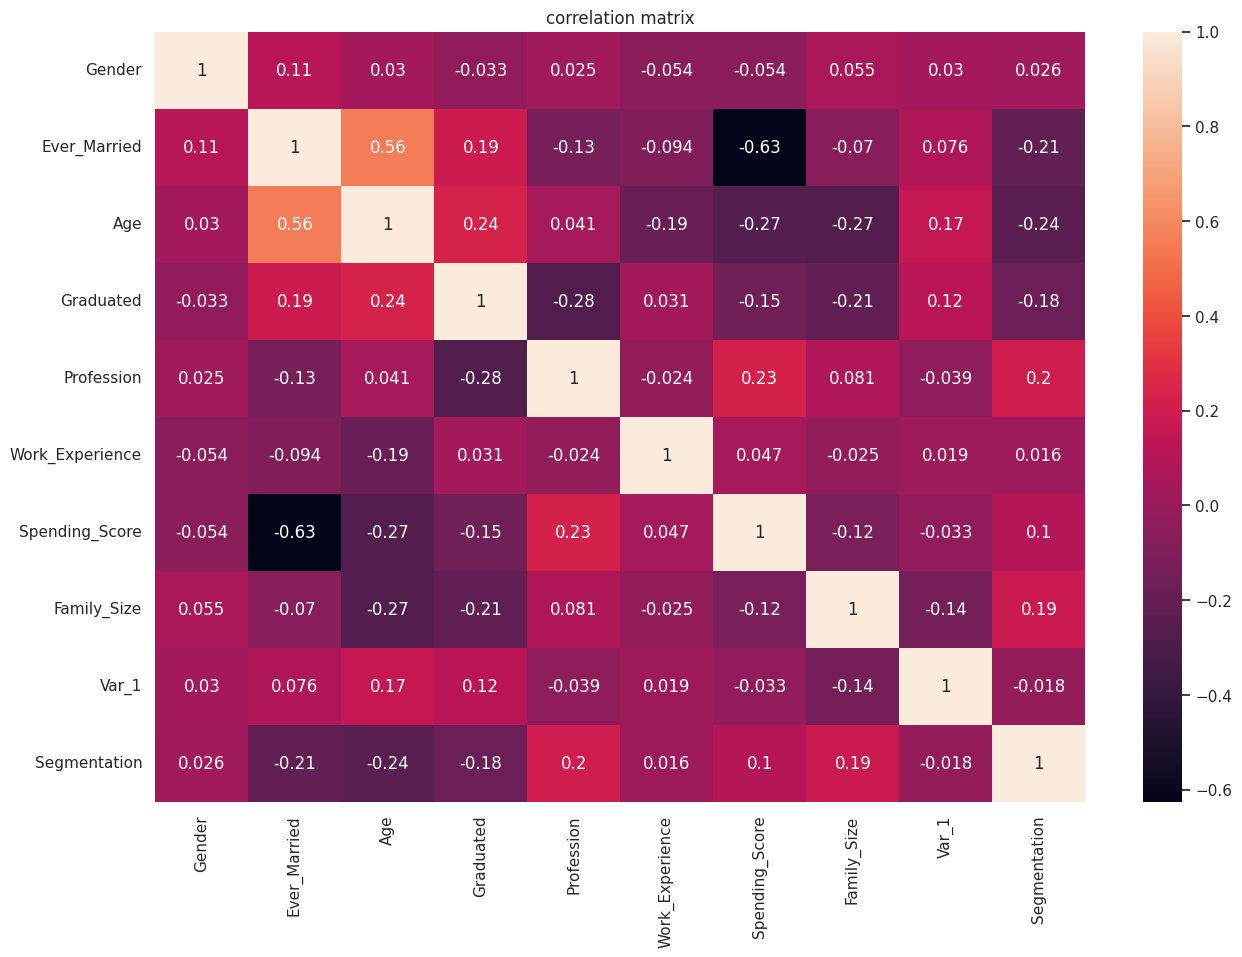

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
plt.title("correlation matrix")
sns.heatmap(df_copy.corr(),annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

for name, model in models:
    # Modeli eğitin
    model.fit(X_train, y_train)

    # Test veri seti üzerinde tahminlerde bulunun
    y_pred = model.predict(X_test)

    # Metrikleri hesaplayın
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Metrikleri yazdırın
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(accuracy, 4)}')
    print(f'Auc: {round(roc_auc, 4)}')
    print(f'Recall: {round(recall, 4)}')
    print(f'Precision: {round(precision, 4)}')
    print(f'F1: {round(f1, 4)}')

########## LogisticRegression ##########
Accuracy: 0.3274
Auc: 0.58
Recall: 0.3191
Precision: 0.305
F1: 0.3004
########## DecisionTree ##########
Accuracy: 0.3144
Auc: 0.5404
Recall: 0.3103
Precision: 0.3096
F1: 0.3073
########## RandomForest ##########
Accuracy: 0.3129
Auc: 0.5678
Recall: 0.3082
Precision: 0.3038
F1: 0.3029
########## XGB ##########
Accuracy: 0.3262
Auc: 0.5762
Recall: 0.3208
Precision: 0.3147
F1: 0.3151
########## LightGBM ##########
Accuracy: 0.3281
Auc: 0.5773
Recall: 0.3229
Precision: 0.3154
F1: 0.3162
########## CatBoost ##########
Accuracy: 0.3243
Auc: 0.5733
Recall: 0.3208
Precision: 0.3135
F1: 0.3144
########## NaiveBayes ##########
Accuracy: 0.3258
Auc: 0.5806
Recall: 0.3269
Precision: 0.3132
F1: 0.3034
########## KNN ##########
Accuracy: 0.3091
Auc: 0.5558
Recall: 0.3018
Precision: 0.3034
F1: 0.3013
########## GBM ##########
Accuracy: 0.335
Auc: 0.5818
Recall: 0.3296
Precision: 0.323
F1: 0.3243


In [ ]:
y_pred

array([0, 2, 0, ..., 0, 2, 3])

In [ ]:
y_pred.reshape(-1, 1)

array([[0],
       [2],
       [0],
       ...,
       [0],
       [2],
       [3]])

In [ ]:
lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)


In [ ]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.32851161020175107

In [ ]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.33536353254663115

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.5162380350592366
En iyi parametreler: {'n_neighbors': 29}


In [ ]:
knn = KNeighborsClassifier(29)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
knn_tuned.score(X_test, y_test)

0.32356299961933765

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.30871716787209746

In [ ]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.33346022078416443

In [ ]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 2}


In [ ]:
svc_tuned = SVC(kernel = "linear", C = 2).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.33231823372668445

In [ ]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [ ]:
svc_model

SVC()

In [ ]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.3307955843167111

In [ ]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [ ]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params,
                         cv = 10,
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [ ]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5, 'gamma': 0.1}


In [ ]:
svc_tuned = SVC(C = 50, gamma = 0.0001).fit(X_train, y_train)

In [ ]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.3307955843167111

In [ ]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [ ]:
cart_model

DecisionTreeClassifier()

In [ ]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.32051770079939096

In [ ]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [ ]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [ ]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'min_samples_split': 48}


In [ ]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 33)
cart_tuned = cart.fit(X_train, y_train)

In [ ]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.33460220784164446

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
rf_model

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.31328511610201754

In [ ]:
rf_params = {"max_depth": [2,5,8,10],"max_features": [2,5,8],"n_estimators": [10,500,1000],"min_samples_split": [2,5,10]}

In [ ]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,rf_params,cv = 10,n_jobs = -1,verbose = 2)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

In [ ]:
rf_tuned = RandomForestClassifier(max_depth = 2,max_features = 5,min_samples_split = 2,n_estimators = 500)

rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
model = LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Logistic Regression")
print(classification_report(y_test, y_pred))

# Decision Tree
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Decision Tree")
print(classification_report(y_test, y_pred))

# Random Forest
model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Random Forest")
print(classification_report(y_test, y_pred))

# XGBoost
model = XGBClassifier(random_state=17, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: XGBoost")
print(classification_report(y_test, y_pred))

# LightGBM
model = LGBMClassifier(random_state=17, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: LightGBM")
print(classification_report(y_test, y_pred))

# CatBoost
model = CatBoostClassifier(random_state=17, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: CatBoost")
print(classification_report(y_test, y_pred))

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Naive Bayes")
print(classification_report(y_test, y_pred))

# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: K-Nearest Neighbors")
print(classification_report(y_test, y_pred))

# Gradient Boosting
model = GradientBoostingClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Gradient Boosting")
print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.38      0.43      0.40       584
           1       0.34      0.06      0.10       490
           2       0.43      0.60      0.50       472
           3       0.56      0.69      0.62       593

    accuracy                           0.45      2139
   macro avg       0.43      0.44      0.41      2139
weighted avg       0.43      0.45      0.42      2139

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.33      0.31      0.32       584
           1       0.31      0.33      0.32       490
           2       0.36      0.38      0.37       472
           3       0.49      0.49      0.49       593

    accuracy                           0.38      2139
   macro avg       0.38      0.38      0.38      2139
weighted avg       0.38      0.38      0.38      2139

Model: Random Forest
              precision    recall  f1-score   support

      

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Logistic Regression
model = LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Logistic Regression")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# Decision Tree
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Decision Tree")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# Random Forest
model = RandomForestClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Random Forest")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# XGBoost
model = XGBClassifier(random_state=17, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: XGBoost")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# LightGBM
model = LGBMClassifier(random_state=17, verbose=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: LightGBM")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# CatBoost
model = CatBoostClassifier(random_state=17, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: CatBoost")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Naive Bayes")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

# K-Nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: K-Nearest Neighbors")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')
# Gradient Boosting
model = GradientBoostingClassifier(random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: Gradient Boosting")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

Model: Logistic Regression
Accuracy: 0.4777933613838242
F1 Score: 0.4468808786568687
ROC AUC Score: 0.7235055494712672
Precision: 0.4704895707293958
Recall: 0.46841783480958893
Model: Decision Tree
Accuracy: 0.39925198690977093
F1 Score: 0.39557543438145737
ROC AUC Score: 0.6002433210948863
Precision: 0.39621902788270474
Recall: 0.3950222309498094
Model: Random Forest
Accuracy: 0.44413277232351567
F1 Score: 0.43627982034537244
ROC AUC Score: 0.7033351334528435
Precision: 0.4355737958031005
Recall: 0.4379845818206737
Model: XGBoost
Accuracy: 0.4735857877512856
F1 Score: 0.465907618771234
ROC AUC Score: 0.7343487656989655
Precision: 0.46553106028821933
Recall: 0.46894125389190644
Model: LightGBM
Accuracy: 0.4782608695652174
F1 Score: 0.47023381954468046
ROC AUC Score: 0.7447967733159397
Precision: 0.47130877196130117
Recall: 0.4730684865724997
Model: CatBoost
Accuracy: 0.4834034595605423
F1 Score: 0.4754420137082773
ROC AUC Score: 0.7421498620296489
Precision: 0.4748019794433166
Recall: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

# Modeli oluştur
model = SVC(random_state=17, probability=True)

# Modeli eğit
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test)

# Performans metriklerini hesapla ve yazdır
print("Model: Support Vector Machine (SVM)")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')


Model: Support Vector Machine (SVM)
Accuracy: 0.48807854137447404
F1 Score: 0.47728921446623956
ROC AUC Score: 0.7297594350681438
Precision: 0.48097068657516673
Recall: 0.4813602323448562


In [ ]:
df_copy.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,-1.28,0,5,-0.45,2,0.77,3,3
1,0,1,-0.33,1,2,-0.45,0,0.11,3,0
2,0,1,1.41,1,2,-0.45,2,-1.20,5,1
3,1,1,1.41,1,7,-0.75,1,-0.54,5,1
4,0,1,-0.21,1,3,-0.45,1,2.09,5,0
5,1,1,0.75,0,0,-0.75,0,-0.54,5,2
6,1,0,-0.69,1,5,-0.45,2,0.11,5,2
7,0,0,-0.63,1,5,-0.45,2,0.11,5,3
8,0,1,1.05,1,2,-0.75,2,0.11,6,3
9,0,1,0.69,1,0,-0.45,0,0.77,5,2


In [ ]:
test_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,-0.45,1,2,-0.80,2,-1.18,5,1
1,1,1,-0.39,1,5,1.65,0,0.77,5,0
2,0,1,1.49,0,0,-0.80,2,-1.18,5,0
3,1,1,0.90,0,4,2.56,1,-0.53,5,1
4,0,0,-1.45,0,8,0.73,2,0.77,5,0


In [ ]:
models = [
    ('lr', LogisticRegression(), {'C': [0.1, 1, 10]}),
    ('dt', DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
    ('rf', RandomForestClassifier(), {'n_estimators': [50, 100, 150]}),
    ('xgb', XGBClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('lgbm', LGBMClassifier(verbose=0), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('cat', CatBoostClassifier(verbose=0), {'iterations': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('svm', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('nb', GaussianNB(), {}),
    ('knn', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('gbm', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]})
]

# Her modeli tek tek dene, hiperparametre optimizasyonu yap ve performansını ölç
for name, model, params in models:
    gs = GridSearchCV(model, params)
    gs.fit(X_train, y_train)
    score = gs.score(X_test, y_test)
    print(f'{name}: {score}, best params: {gs.best_params_}')

lr: 0.4787283777466106, best params: {'C': 10}
dt: 0.4749883122954652, best params: {'max_depth': 5}
rf: 0.4488078541374474, best params: {'n_estimators': 150}
xgb: 0.48714352501168773, best params: {'learning_rate': 0.1, 'n_estimators': 50}
lgbm: 0.48620850864890136, best params: {'learning_rate': 0.01, 'n_estimators': 150}
cat: 0.49789621318373073, best params: {'iterations': 100, 'learning_rate': 0.1}
svm: 0.48807854137447404, best params: {'C': 1, 'kernel': 'rbf'}
nb: 0.44647031323048153, best params: {}
knn: 0.42823749415614776, best params: {'n_neighbors': 7}
gbm: 0.49696119682094436, best params: {'learning_rate': 0.1, 'n_estimators': 50}


In [ ]:
logreg = LogisticRegression()

# Hiperparametre aralığını tanımlayın
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# GridSearchCV nesnesini oluşturun
grid_search = GridSearchCV(logreg, param_grid, cv=20)

# Modeli eğitin
grid_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve skoru yazdırın
print("En iyi hiperparametreler: ", grid_search.best_params_)
print("En iyi skor: ", grid_search.best_score_)

# Test setindeki performansı kontrol edin
print("Test seti skoru: ", grid_search.score(X_test, y_test))


En iyi hiperparametreler:  {'C': 100}
En iyi skor:  0.46551795837072385
Test seti skoru:  0.4787283777466106


In [ ]:
df_bir.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_0,Gender_1,Ever_Married_0,Ever_Married_1,Graduated_0,Graduated_1,Profession_0,Profession_1,Profession_2,Profession_3,Profession_4,Profession_5,Profession_6,Profession_7,Profession_8,Spending_Score_0,Spending_Score_1,Spending_Score_2,Var_1_0,Var_1_1,Var_1_2,Var_1_3,Var_1_4,Var_1_5,Var_1_6
0,-1.28,-0.45,0.77,3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,-0.33,-0.45,0.11,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1.41,-0.45,-1.20,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1.41,-0.75,-0.54,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,-0.21,-0.45,2.09,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model: CatBoost")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="macro")}')
print(f'ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

0:	learn: 1.3531055	total: 8.81ms	remaining: 873ms
1:	learn: 1.3227426	total: 17.6ms	remaining: 864ms
2:	learn: 1.3003414	total: 24ms	remaining: 775ms
3:	learn: 1.2814570	total: 32.2ms	remaining: 772ms
4:	learn: 1.2637212	total: 40.2ms	remaining: 764ms
5:	learn: 1.2492327	total: 48.5ms	remaining: 760ms
6:	learn: 1.2382768	total: 57.2ms	remaining: 759ms
7:	learn: 1.2271812	total: 65.3ms	remaining: 751ms
8:	learn: 1.2175887	total: 73.4ms	remaining: 742ms
9:	learn: 1.2098649	total: 81.3ms	remaining: 732ms
10:	learn: 1.2026487	total: 89.6ms	remaining: 725ms
11:	learn: 1.1968811	total: 97.4ms	remaining: 714ms
12:	learn: 1.1912693	total: 105ms	remaining: 702ms
13:	learn: 1.1858881	total: 113ms	remaining: 694ms
14:	learn: 1.1816779	total: 121ms	remaining: 684ms
15:	learn: 1.1780246	total: 129ms	remaining: 677ms
16:	learn: 1.1752957	total: 137ms	remaining: 670ms
17:	learn: 1.1711932	total: 145ms	remaining: 659ms
18:	learn: 1.1684825	total: 152ms	remaining: 649ms
19:	learn: 1.1658127	total: 160